In [1]:
#ini-iPython

# Executando no diretório principal

In [2]:
import os
os.chdir('../../') #Executando na pasta Visual_Memory
import sys
sys.path.append('./include')
sys.path.append('./src')
sys.path.append('./Workbench/iPython')
#end-iPython

---- Imports ----

In [3]:
# Libraries to be used.
import sys
#des-iPython sys.path.append("../include")
#des-iPython sys.path.append("../src")

In [4]:
# The standard libraries used in the visual memory system.


In [5]:
# Used class developed by RoboFEI-HT.
#ini-iPython - Usando Classe KalmanFilter como instanciação
os.system("sed -i 's/_//g' ./Workbench/iPython/KalmanFilter.py")
os.system("sed -i 's/init/__init__/g' ./Workbench/iPython/KalmanFilter.py")
os.system("sed -i '/@abstractmethod/d' ./Workbench/iPython/KalmanFilter.py")
os.system("sed -i 's/conf/_conf/g' ./Workbench/iPython/KalmanFilter.py")
os.system("sed -i 's/invquick/inv_quick/g' ./Workbench/iPython/KalmanFilter.py")
os.system("sed -i 's/linearacceleration/linear_acceleration/g' ./Workbench/iPython/KalmanFilter.py")
os.system("sed -i 's/visionerror/vision_error/g' ./Workbench/iPython/KalmanFilter.py")
os.system("sed -i 's/xspeed/x_speed/g' ./Workbench/iPython/KalmanFilter.py")

os.system("sed -i '/__metaclass__/d' ./Workbench/iPython/BasicThread.py")
os.system("sed -i 's/_//g' ./Workbench/iPython/BasicThread.py")
os.system("sed -i 's/init/__init__/g' ./Workbench/iPython/BasicThread.py")
os.system("sed -i '/@abstractmethod/d' ./Workbench/iPython/BasicThread.py")

#end-iPython
from BasicThread import * # Responsible for implementing the methods and variables responsible for managing the thread.
sym.init_printing() #debug-iPython

# Class to Robots
Class responsible for performing robots tracking.
doxygen-iPython

In [6]:
#des-iPython class Robots(BasicThread):
#ini-tab -> Iniciando código classe

---- Variables ----

# listfunction
.
doxygen-iPython

In [7]:
__listfunction = None #self-iPython __listfunction

# robotnumber
.
doxygen-iPython

In [8]:
__robotnumber = None #self-iPython __robotnumber

# posdata
.
doxygen-iPython

In [1]:
__posdata = None #self-iPython __posdata

# timenumber
.
doxygen-iPython

In [9]:
timenumber = 0 #self-iPython timenumber

# weight
.
doxygen-iPython

In [9]:
weight = 0 #self-iPython weight

In [10]:
#ini-iPython

# ------- Lista de funções herdadas -------

#self-iPython _finalize

# ------- Lista variaveis herdadas -------

#self-iPython _t

#self-iPython _A
#self-iPython _B
#self-iPython _R
#self-iPython _C

#self-iPython _px
#self-iPython _py
#self-iPython _vx
#self-iPython _vy
#self-iPython _ax
#self-iPython _ay

#self-iPython _parameters
#self-iPython _conf
#self-iPython _bkb

# Estados
#self-iPython _state
#self-iPython _predictedstate
#self-iPython _speeds


# ------- Lista de funções -------

#self-iPython reset
#self-iPython predict
#self-iPython __predictVector
#self-iPython predictThread
#self-iPython __updateVector
#self-iPython updateThread
#self-iPython run
#self-iPython end

#end-iPython - Fim listas

# reset
.
doxygen-iPython

In [11]:
#eself-iPython reset
#edes-iPython def reset(self):
def reset( ):
    #edes-iPython super(Robots, self)._reset( )
    kalman.reset( )
    
    #edes-iPython _A = _A[:-2,:-2]
    kalman.A = kalman.A[:-2,:-2]
    #edes-iPython _B = _B[:-2,:]
    kalman.B = kalman.B[:-2,:]
    #edes-iPython _R = _R[:-2,:-2]
    kalman.R = kalman.R[:-2,:-2]
    #edes-iPython _C = _C[:,:-2]
    kalman.C = kalman.C[:,:-2]
    
    #edes-iPython _predictedstate["x"] = _predictedstate["x"][:-2,:]
    kalman.predictedstate["x"] = kalman.predictedstate["x"][:-2,:]
    #edes-iPython _predictedstate["covariance"] = _predictedstate["covariance"][:-2,:-2] #self-iPython reset
    kalman.predictedstate["covariance"] = kalman.predictedstate["covariance"][:-2,:-2]

In [12]:
#ini-iPython

## Teste reset

KALMAN FILTER - ROBOTS section not found!


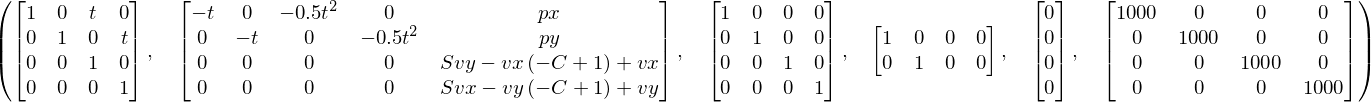

In [13]:
vrx, vry, arx, ary = sym.symbols("vr_x vr_y ar_x ar_y")
s = Speeds( ) #debug-iPython
kalman = KalmanFilter(s, "Robots")
reset( )
kalman.A, kalman.B, kalman.R, kalman.C, kalman.predictedstate["x"], kalman.predictedstate["covariance"]

In [14]:
del kalman
del s
#end-iPython

# Constructor Class
doxygen-iPython

In [16]:
s = Speeds( ) #debug-iPython
pos = [0, 0] #debug-iPython
#des-iPython def __init__(self, s, pos):
#ini-tab -> Criando construtor
# Instantiating constructor for inherited class.
#edes-iPython super(Robots, self).__init__(s, "Robots")
kalman = BasicThread(s, "Robots")

__posdata = pos

# Creating characteristic variables for Robots and reading.
#des-iPython _parameters.update({ })
#ini-iPython
kalman.parameters.update({ })
#end-iPython
#edes-iPython _parameters = _conf.readVariables(_parameters)
kalman.parameters = kalman._conf.readVariables(kalman.parameters)

reset( )

__listfunction = [ ]

KALMAN FILTER - ROBOTS section not found!
2 4


In [ ]:
#end-tab -> Finalizando construtor

In [ ]:
#ini-iPython

## Teste construtor

In [ ]:
kalman._end( )
print kalman.parameters

vrx, vry, arx, ary = sym.symbols("vr_x vr_y ar_x ar_y")

__u = sym.Matrix([
    [vrx],
    [vry],
    [arx],
    [ary],
    [1],
])

kalman.B*__u
#end-iPython

# __predictVector
.
doxygen-iPython

In [ ]:
#eself-iPython __predictVector
#edes-iPython def __predictVector(self, vector):
def __predictVector(vector):
    tnow, movements = vector
    #edes-iPython super(Robots, self).predict(tnow, movements)
    kalman.predict(tnow, movements)
    
    if tnow == None and __time__robotnumber != 0:
        if __time__robotnumber == 1:
            #edes-iPython _bkb.write_float(
            kalman._bkb.write_float(
                "VISUAL_MEMORY_AL_" + str(__robotnumber).zfill(2) + "_X",
                #edes-iPython _state["x"][0]
                kalman.state["x"][0]
            )
            #edes-iPython _bkb.write_float(
            kalman._bkb.write_float(
                "VISUAL_MEMORY_AL_" + str(__robotnumber).zfill(2) + "_Y",
                #edes-iPython _state["x"][1]
                kalman.state["x"][1]
            )
            
            #edes-iPython if sym.sqrt(_state["x"][2]**2 + _state["x"][3]**2) > _bkb.read_float("VISUAL_MEMORY_AL_" + str(__robotnumber).zfill(2) + "_MAX_VEL"):
            if sym.sqrt(kalman.state["x"][2]**2 + kalman.state["x"][3]**2) > kalman._bkb.read_float("VISUAL_MEMORY_AL_" + str(__robotnumber).zfill(2) + "_MAX_VEL"):
                #edes-iPython _bkb.write_float(
                kalman._bkb.write_float(
                    "VISUAL_MEMORY_AL_" + str(__robotnumber).zfill(2) + "_MAX_VEL",
                    #edes-iPython sym.sqrt(_state["x"][2]**2 + _state["x"][3]**2)
                    sym.sqrt(kalman.state["x"][2]**2 + kalman.state["x"][3]**2)
                )
        else:
            #edes-iPython _bkb.write_float(
            kalman._bkb.write_float(
                "VISUAL_MEMORY_OP_" + str(__robotnumber).zfill(2) + "_X",
                #edes-iPython _state["x"][0]
                kalman.state["x"][0]
            )
            #edes-iPython _bkb.write_float(
            kalman._bkb.write_float(
                "VISUAL_MEMORY_OP_" + str(__robotnumber).zfill(2) + "_Y",
                #edes-iPython _state["x"][1]
                kalman.state["x"][1]
            )
            
            #edes-iPython if sym.sqrt(_state["x"][2]**2 + _state["x"][3]**2) > _bkb.read_float("VISUAL_MEMORY_AL_" + str(__robotnumber).zfill(2) + "_MAX_VEL"):
            if sym.sqrt(kalman.state["x"][2]**2 + kalman.state["x"][3]**2) > kalman._bkb.read_float("VISUAL_MEMORY_AL_" + str(__robotnumber).zfill(2) + "_MAX_VEL"):
                #edes-iPython _bkb.write_float(
                kalman._bkb.write_float(
                    "VISUAL_MEMORY_OP_" + str(__robotnumber).zfill(2) + "_MAX_VEL",
                    #edes-iPython sym.sqrt(_state["x"][2]**2 + _state["x"][3]**2)
                    sym.sqrt(kalman.state["x"][2]**2 + kalman.state["x"][3]**2)
                ) #self-iPython __predictVector

# predictThread
.
doxygen-iPython

In [ ]:
#eself-iPython predictThread
#edes-iPython def predictThread(self, tnow = None, movements = None):
def predictThread(tnow = None, movements = None):
    __listfunction.append([__predictVector, [tnow, movements]])
    #edes-iPython _resume( ) #self-iPython predictThread
    kalman.resume( )

In [ ]:
#ini-iPython

## Teste predictThread

In [ ]:
predictThread(1.0, 1)
#end-iPython

# updateVector
.
doxygen-iPython

In [ ]:
#eself-iPython __updateVector
#edes-iPython def __updateVector(self, vector):
def __updateVector(data):
    #edes-iPython super(Robots, self).update(data)
    kalman.update(data)
    
    if data["tag"] != 0:
        timenumber = data["tag"] #self-iPython __updateVector

# updateThread
.
doxygen-iPython

In [ ]:
#eself-iPython updateThread
#edes-iPython def updateThread(self, tnow = None, movements = None):
def updateThread(data):
    __listfunction.append([__updateVector, data])
    #edes-iPython _resume( ) #self-iPython updateThread
    kalman.resume( )

In [ ]:
#ini-iPython

## Teste predictThread

In [ ]:
predictThread(1.0, 1)
#end-iPython

# run
.
doxygen-iPython

In [ ]:
#eself-iPython run
#edes-iPython def run(self):
def run( ):
    global kalman #debug-iPython
    #edes-iPython self.__running = True
    kalman.running = True
    #edes-iPython while self.__running:
    while kalman.running:
        #edes-iPython with self._pausethread:
        with kalman.pausethread:
            while __listfunction != []:
                func, data = __listfunction.pop(0)
                func(data)
        #edes-iPython self._pause( ) #self-iPython run
        kalman.pause( )

In [ ]:
#ini-iPython

## Teste run

In [ ]:
kalman = BasicThread(s, "Robots")
kalman.reset()
kalman.run = run
kalman.start( )

data = {
    "target": 1,
    "pos": [1, 1],
    "time": 1.0,
    "movement": 1
}
__listfunction = [ ]

updateThread(data)

# time.sleep(1)
print "listfunction:", __listfunction
kalman.predictedstate

In [ ]:
print kalman.predictedstate
time.sleep(1)
kalman.finalize( )
print kalman.running, kalman.pauseistrue
#end-iPython

# end
.
doxygen-iPython

In [ ]:
#eself-iPython end
#edes-iPython def end(self):
def end( ):
    __listfunction = [ ]
    #edes-iPython _finalize( )
    kalman.finalize( )
    #edes-iPython super(Robots, self)._end( ) #self-iPython end
    kalman._end( ) #self-iPython end

In [ ]:
#ini-iPython

## Teste end

In [ ]:
end( )
#end-iPython

In [ ]:
#end-tab -> Finalizando classe

In [ ]:
#ini-iPython

# nova_variavel
.
doxygen-iPython

In [ ]:
nova_variavel = None #self-iPython nova_variavel

# nova_funcao
.
doxygen-iPython

In [ ]:
# eself-iPython nova_funcao
# edes-iPython def nova_funcao(self, variaveis_funcao):
def nova_funcao(variaveis_funcao):
    pass # self-iPython nova_funcao

In [ ]:
#ini-iPython

## Teste nova_funcao

In [ ]:

#end-iPython

In [ ]:
#end-iPython